In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%cd /content/drive/MyDrive/21-1/Computational Physics/data/datafolder

/content/drive/MyDrive/21-1/Computational Physics/data/datafolder


## 1

In [6]:
df1=pd.read_csv('3.1_5.dat',header=None)

In [7]:
df1=df1.T
df1.columns=['x','y']

In [24]:
pfit=np.polyfit(df1.x,df1.y,2)
line=np.poly1d(pfit)
print(f'y={pfit[2]:.4}+{pfit[1]:.4}x+{pfit[0]:.4}x^2')

y=-0.8256+3.701x+-1.15x^2


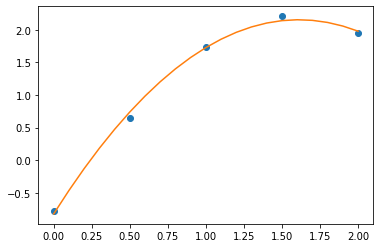

In [18]:
x=np.arange(0,2.1,0.1)
plt.plot(df1.x,df1.y,'o')
plt.plot(x,line(x))

In [19]:
from scipy.optimize import root_scalar
root_scalar(line-1,bracket=[0.5,1])

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.608085247022249

In [ ]:
#따라서 x=0.6080에서 y=1이다

## 2

In [28]:
#if tank full h=2r, r^2*L은 상수이므로 1로 하면(연립하여 상쇄하면)
h_r=2
pi=np.arccos(1-2)

In [29]:
v=pi-(1-2)*np.sin(pi)

In [60]:
ans=3*v/4
ans

2.356194490192345

In [61]:
def func(x):
  ans=3*v/4
  pi=np.arccos(1-x)
  return pi-(1-x)*np.sin(pi)-ans

In [62]:
root_scalar(func,bracket=[1,2])

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.4039727532995172

In [ ]:
#따라서 탱크가 3/4차 있을때, h/r=1.403이다

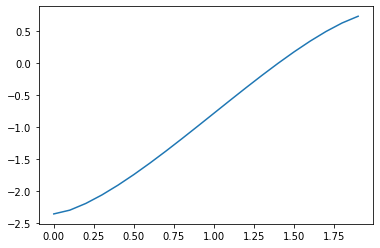

In [63]:
x=np.arange(0,2,0.1)
plt.plot(x,func(x))

## 3

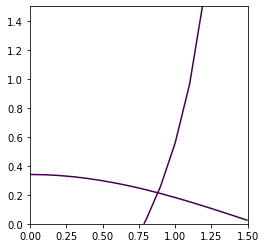

In [71]:
delta=0.1
xdata=np.arange(0,1.6,delta)
ydata=xdata.copy()
x,y=np.meshgrid(xdata,ydata)
def f1(x,y):
  return np.tan(x)-y-1

def f2(x,y):
  return np.cos(x)-3*np.sin(y)

F1=f1(x,y)
F2=f2(x,y)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_aspect('equal')
plt.contour(x,y,F1,[0])
plt.contour(x,y,F2,[0])


In [72]:
from scipy.optimize import root
def func(x):
  return [f1(*x),f2(*x)]

x0=[1,0]
sol=root(func,x0)
sol.x

array([0.88159259, 0.21359471])

In [ ]:
#그래프를 통해 근이 하나이고 x=0.8815, y=0.2135를 얻는다.

In [73]:
func(sol.x)

[2.398081733190338e-14, -5.10702591327572e-15]

## 4

In [78]:
delta=0.1
xdata=np.arange(0,2,delta)
ydata=xdata.copy()
x,y,z=np.meshgrid(xdata,xdata,xdata)
#평형 방정식을 연립하면 f1이 된다.
def f1(x,y,z):
  return 5*np.tan(x)-9*np.tan(y)-4*np.tan(y)

def f2(x,y,z):
  return -4*np.sin(x)-6*np.sin(y)+5*np.sin(z)+3

def f3(x,y,z):
  return 4*np.cos(x)+6*np.cos(y)+5*np.cos(z)-12


In [79]:
def func(x):
  return [f1(*x),f2(*x),f3(*x)]

x0=[1,0,0]
sol=root(func,x0)
sol.x

array([0.90624258, 0.45637285, 0.59268218])

In [80]:
print(f'theta1=0.90624, theta2=0.45637, theta3=0.59268')

theta1=0.90624, theta2=0.45637, theta3=0.59268
